<a href="https://colab.research.google.com/github/Devanshu0502/Chess-Pieces-Classification/blob/main/Classification_using_Imagenet_of_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

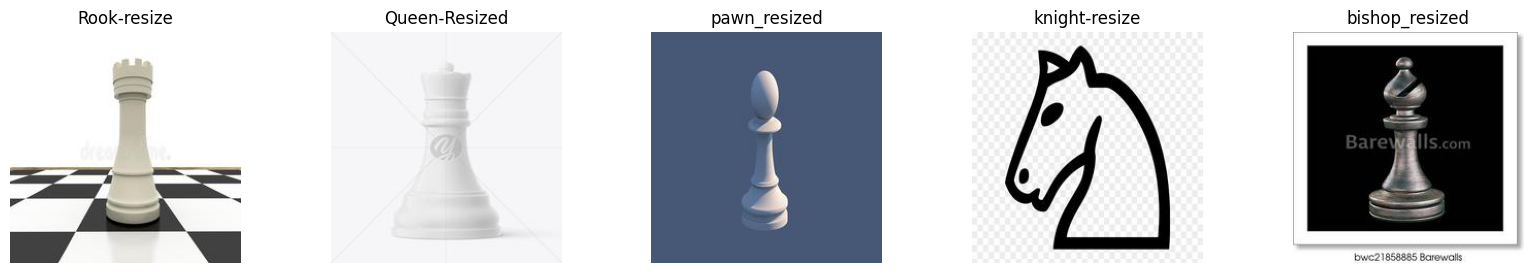

In [3]:
file_path = '/content/drive/MyDrive/Projects/Chess/Dataset'
fig, axs = plt.subplots(1,5,figsize=(20,3))
for i,x in enumerate(os.listdir(file_path)):
    img_path = file_path+'/'+ x + '/' + random.choice(os.listdir(file_path+'/'+x))
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(x)
plt.show()

In [4]:
path = '/content/drive/MyDrive/Projects/Chess/Dataset'
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                                         validation_split=.1)
train_data = datagen.flow_from_directory(path,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='training')
test_data = datagen.flow_from_directory(path,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation',
                                       shuffle=False)

Found 588 images belonging to 5 classes.
Found 63 images belonging to 5 classes.


In [5]:
import tensorflow_hub as hub

resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                        trainable=False,
                                        name='feature_extraction_layer',
                                        input_shape=(224,224,3))
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                              patience=3,
                                                              verbose=1,
                                                              factor=.5,
                                                              min_lr=.00001)
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(5,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(train_data,
                   epochs=10,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/10
19/19 [==============================] - 197s 10s/step - loss: 1.3534 - accuracy: 0.4626 - val_loss: 0.8485 - val_accuracy: 0.6508
Epoch 2/10
19/19 [==============================] - 97s 5s/step - loss: 0.7260 - accuracy: 0.7466 - val_loss: 0.5043 - val_accuracy: 0.8095
Epoch 3/10
19/19 [==============================] - 97s 5s/step - loss: 0.5082 - accuracy: 0.8469 - val_loss: 0.4021 - val_accuracy: 0.9048
Epoch 4/10
19/19 [==============================] - 99s 5s/step - loss: 0.4034 - accuracy: 0.8912 - val_loss: 0.3480 - val_accuracy: 0.9206
Epoch 5/10
19/19 [==============================] - 98s 5s/step - loss: 0.3374 - accuracy: 0.9235 - val_loss: 0.3193 - val_accuracy: 0.9365
Epoch 6/10
19/19 [==============================] - 98s 5s/step - loss: 0.2835 - accuracy: 0.9456 - val_loss: 0.2738 - val_accuracy: 0.9524
Epoch 7/10
19/19 [==============================] - 98s 5s/step - loss: 0.2447 - accuracy: 0.9524 - val_loss: 0.2756 - val_accuracy: 0.9524
Epoch 8/10
19/19 [

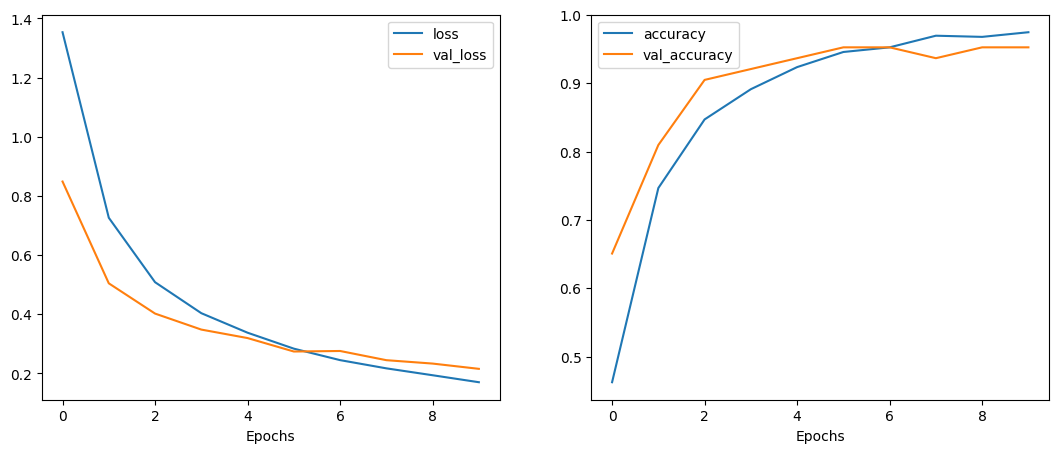

In [6]:
fig, axs = plt.subplots(1,2,figsize=(13,5))
axs[0].plot(pd.DataFrame(history.history)[['loss','val_loss']])
axs[0].set_xlabel("Epochs")
axs[0].legend(['loss','val_loss'])
axs[1].plot(pd.DataFrame(history.history)[['accuracy','val_accuracy']])
axs[1].set_xlabel("Epochs")
axs[1].legend(['accuracy','val_accuracy'])

In [7]:
from sklearn.metrics import classification_report
y_pred = tf.argmax(model.predict(test_data),axis=1)
classes = list(test_data.class_indices.keys())
pred_classes = [classes[x] for x in y_pred]
labels_classes = [classes[x] for x in test_data.labels]
print(classification_report(labels_classes,pred_classes))

2/2 [==============================] - 11s 4s/step
                precision    recall  f1-score   support

 Queen-Resized       0.92      1.00      0.96        11
   Rook-resize       1.00      1.00      1.00        13
bishop_resized       0.87      0.93      0.90        14
 knight-resize       1.00      1.00      1.00        17
  pawn_resized       1.00      0.75      0.86         8

      accuracy                           0.95        63
     macro avg       0.96      0.94      0.94        63
  weighted avg       0.96      0.95      0.95        63



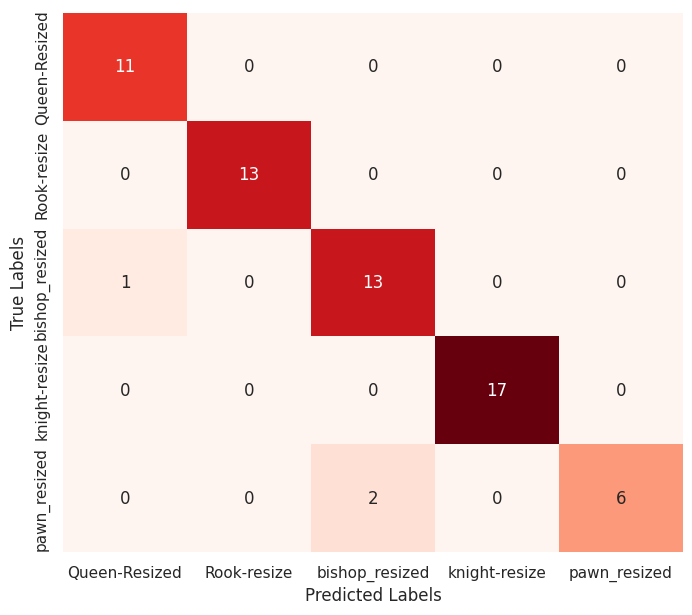

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(labels_classes,pred_classes)
sns.set_theme(rc={'figure.figsize':(8,7)})
ax = sns.heatmap(cf_matrix,annot=True,cmap='Reds',fmt="g",xticklabels=classes,yticklabels=classes,cbar=False)
ax.set_ylabel('True Labels')
ax.set_xlabel('Predicted Labels');